# Data Collection

Here we are collecting resurant data https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv and clubing the zip code data with yelp

Restaurant Data  https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv
NY zip code data https://data.ny.gov/api/views/juva-r6g2/rows.csv


## Restaurant Inspection Data

In [9]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Restaurant Inspection Data  (column description)

Data Source -https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j


* `CAMIS` : unique identififer for the establishment(restaurant)
> - 10-digit integer, unique CAMIS for each establishments
* `DBA` : establishment(restaurant) name
> - DBA = Doing Business As
* `BORO` : borough of establishment(restaurant) location
> - Manhattan(New York) 
> - Bronx
> - Brooklyn
> - Queens
> - Staten Island
> - Missing
* `BUILDING` : building number for establishment(restaurant) location
* `STREET` : street name for establishment(restaurant) location
* `ZIPCODE` : zip code of establishment(restaurant) location
* `PHONE` : phone number
* `CUISINE DESCRIPTION` : establishment(restaurant) cuisine
* `INSPECTION DATE` : date of inspection
> - Inspection dates of 1/1/1900 mean the new establishments have not yet had an inspection
* `ACTION` : action associated with each establishment(restaurant) inspection
> - Missing = not yet inspected
* `VIOLATION CODE` : violation code associated with an establishment(restaurant) inspection
> - 02~10, 99 = scored category
> - 15~22 = unscored category
* `VIOLATION DESCRIPTION` : violation description associated with an establishment(restaurant) inspection
* `CRITICAL FLAG` : indicator of critical violation
> - Critical / Not Critical / Not Applicable
* `SCORE` : total score for a paricular inspection
> - A = 0 ~ 13 
> - B = 14 ~ 27 
> - C = 28+
* `GRADE` : grade associated with the inspection
> - A = Grade A
> - B = Grade B
> - C = Grade C
> - Z = Grade Pending
> - P = Grade Pending issued on re-opening following an initial inspection that resulted in a closure
* `GRADE DATE` : date when grade was issued to the establishment(restaurant)
* `RECORD DATE` : date record was added to dataset
* `INSPECTION TYPE` : a combination of the inspection program and the type of inspection performed

### Import data

In [10]:
file_name='https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv'
df=pd.read_csv(file_name)
df.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,18.0,NaN,NaN,05/31/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,18.0,NaN,NaN,05/31/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,18.0,NaN,NaN,05/31/2019,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,10E,Accurate thermometer not provided in refrigera...,Not Critical,18.0,NaN,NaN,05/31/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/16/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,18.0,NaN,NaN,05/31/2019,Cycle Inspection / Initial Inspection


In [11]:
# Check data types
df.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

### `RECORD DATE` is all identical. Let's drop it.

In [12]:
df.drop('RECORD DATE', axis=1, inplace=True)

### Change `DATES` data type to `datetime`

In [13]:
for col in ['INSPECTION DATE', 'GRADE DATE']:
    df[col] = pd.to_datetime(df[col])
df.dtypes

CAMIS                             int64
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                         float64
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
INSPECTION TYPE                  object
dtype: object

### Clean text data by removing space and making it lower case to make it easier to manipulate data.

- #### Columns

In [14]:
df.columns = [str(i).lower().replace(" ","_") for i in df.columns]

- #### features

In [15]:
# Turn all text to lower case
df['dba'] = [str(i).lower() for i in df['dba']]
df['boro'] = [i.lower() for i in df['boro']]
df['building'] = [str(i) for i in df['building']]
df['street'] = df.apply(lambda row: str(row.street).lower(), axis=1)

### Convert datatype of `phone` and `zipcode` to integer

- #### zipcode

In [16]:
# Fill null value in `phone` column with 0 first, 
# and then change to integer
df['zipcode'].fillna(00000, inplace=True)
df['zipcode'] = [int(i) for i in df['zipcode']]

- #### phone

In [17]:
# Remove "-" or space in phone
df['phone'] = [str(i).replace("_", "") for i in df['phone']]
df['phone'] = [str(i).replace(" ", "") for i in df['phone']]

# Remove any row without 10 digit phone number.
df['phone'] = df.apply(lambda x: int(x.phone) if len(str(x.phone))==10 else 0 ,axis=1)
df = df[df['phone'] != 0]

### Sort values by `CAMIS`, `INSPECTION DATE`, and `VIOLATION CODE`.

In [18]:
df.sort_values(by=["camis", "inspection_date", 'violation_code'], inplace=True)

### Let's get unique inspection result by `CAMIS` and `INSPECTION DATE`.

In [19]:
df_unique = df.drop_duplicates(subset=["camis", "inspection_date"])

#### Check each column with null values

In [20]:
for i in df_unique.columns:
    if df_unique[i].isnull().sum() != 0:
        print(i)
        print(df_unique[i].isnull().sum())
        print("-" * 20)

action
1394
--------------------
violation_code
4393
--------------------
violation_description
4564
--------------------
score
4128
--------------------
grade
49442
--------------------
grade_date
49935
--------------------
inspection_type
1394
--------------------


> DBA with null values have no meaningful data. Let's drop the column.

In [21]:
df_unique['dba'].dropna(inplace=True)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/series.py:2952: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [23]:
df_unique[df_unique['grade'] == "Z"]#['score'].value_counts().sort_index()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,inspection_type
1350,40365499,yankee tavern,bronx,72,east 161 street,10451,7182926130,American,2019-03-11,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,25.0,Z,2019-03-11,Cycle Inspection / Re-inspection
1455,40365577,v & t restaurant,manhattan,1024,amsterdam avenue,10025,2126668051,Italian,2019-02-20,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,22.0,Z,2019-02-20,Cycle Inspection / Re-inspection
2110,40366586,shimons kosher pizza,queens,7124,main street,11367,7187931491,Jewish/Kosher,2019-05-15,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,40.0,Z,2019-05-15,Cycle Inspection / Re-inspection
2442,40367005,da vinci pizza,brooklyn,6514,18 avenue,11204,7182325855,Pizza/Italian,2019-05-29,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,27.0,Z,2019-05-29,Cycle Inspection / Re-inspection
2774,40367540,piccola venezia,queens,4201,28 avenue,11103,7187218470,Italian,2019-05-11,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,96.0,Z,2019-05-11,Cycle Inspection / Re-inspection
3125,40368271,cherry tavern,manhattan,441,east 6 street,10009,2127771448,American,2019-04-08,Establishment re-opened by DOHMH,04L,Evidence of mice or live mice present in facil...,Critical,18.0,Z,2019-04-08,Cycle Inspection / Reopening Inspection
3439,40369012,valentino's pizza,queens,7147,kissena boulevard,11367,7185916464,Pizza/Italian,2019-03-06,Establishment re-opened by DOHMH,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,7.0,Z,2019-03-06,Cycle Inspection / Reopening Inspection
3534,40369087,blue bay restaurant,bronx,3533,johnson avenue,10463,7188846476,American,2019-05-20,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,47.0,Z,2019-05-20,Cycle Inspection / Re-inspection
3995,40369878,villa mosconi restaurant,manhattan,69,macdougal street,10012,2126730390,Italian,2019-05-16,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,19.0,Z,2019-05-16,Cycle Inspection / Re-inspection
4956,40373938,ihop,bronx,5655,broadway,10463,7185494565,American,2019-03-28,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,26.0,Z,2019-03-28,Cycle Inspection / Re-inspection


In [24]:
df_unique.drop('grade', inplace=True, axis=1)
df_unique.drop('grade_date', inplace=True, axis=1)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### Drop the rows which `INSPECTION DATE` is `1900-01-01`

> For the `INSPECTION DATE` with `1900-01-01` value has no target value, let's drop those rows.

In [25]:
df_unique = df_unique[df_unique["inspection_date"] != '1900-01-01']

### Drop the rows with null values from our target variable `SCORE` 

In [26]:
df_unique = df_unique.dropna(subset=["score"])


### Fill in missing data in `BORO` columns based on the zip code.

In [27]:
df_unique[df_unique['boro'] == "missing"]["zipcode"].value_counts()

11249    32
10270     6
10168     5
10285     3
Name: zipcode, dtype: int64

> Both `11249`, `10281`, and `10168` is in `Manhattan`.

In [28]:
df_unique['boro'][df_unique['boro'] == 'missing'] = 'manhattan'

### Fill n/a for `VIOLATION CODE` and `VIOLATION DESCRIPTION`

In [29]:
df_unique["violation_code"].fillna("na", inplace=True)
df_unique["violation_description"].fillna("na", inplace=True)

(array([  4.08130000e+04,   6.21000000e+03,   4.09000000e+02,
          1.41800000e+03,   5.00000000e+01,   1.55000000e+02,
          0.00000000e+00,   0.00000000e+00,   8.32000000e+02,
          3.85600000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   9.57900000e+03,   1.97200000e+03,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.43000000e+02,
          1.70000000e+01,   7.80000000e+01,   4.28400000e+03,
          8.60000000e+02,   0.00000000e+00,   4.11300000e+03,
          2.70880000e+04,   7.87000000e+02,   0.00000000e+00,
          0.00000000e+00,   1.14320000e+04,   4.49200000e+03,
          7.02100000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

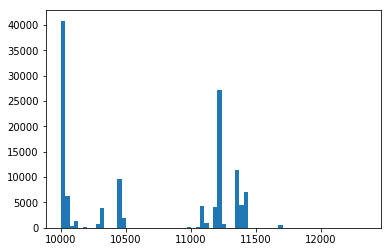

In [20]:
plt.hist(df_unique.zipcode[df_unique.zipcode != 0], bins=70)


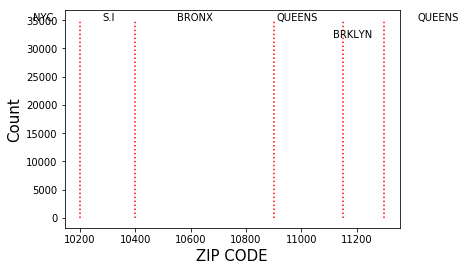

In [30]:
plt.vlines(10200, ymin=0, ymax=35000, colors='red', linestyles='dotted' )
plt.vlines(10400, ymin=0, ymax=35000, colors='red', linestyles='dotted' )
plt.vlines(10900, ymin=0, ymax=35000, colors='red', linestyles='dotted' )
plt.vlines(11150, ymin=0, ymax=35000, colors='red', linestyles='dotted' )
plt.vlines(11300, ymin=0, ymax=35000, colors='red', linestyles='dotted' )
plt.text(10030,35000,'NYC')
plt.text(10280,35000,'S.I')
plt.text(10550,35000,'BRONX')
plt.text(10910,35000,'QUEENS')
plt.text(11115,32000,'BRKLYN')
plt.text(11420,35000,'QUEENS')

plt.xlabel('ZIP CODE', size=15)
plt.ylabel('Count', size=15)

plt.savefig('../zipcode_distribution_prior')

In [31]:
df_unique

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,inspection_type
7,30075445,morris park bake shop,bronx,1007,morris park ave,10462,7188924968,Bakery,2017-05-18,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,Cycle Inspection / Initial Inspection
5,30075445,morris park bake shop,bronx,1007,morris park ave,10462,7188924968,Bakery,2018-05-11,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,Cycle Inspection / Initial Inspection
0,30075445,morris park bake shop,bronx,1007,morris park ave,10462,7188924968,Bakery,2019-05-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,18.0,Cycle Inspection / Initial Inspection
31,30112340,wendy's,brooklyn,469,flatbush avenue,11225,7182875005,Hamburgers,2016-04-12,No violations were recorded at the time of thi...,na,na,Not Applicable,0.0,Cycle Inspection / Initial Inspection
25,30112340,wendy's,brooklyn,469,flatbush avenue,11225,7182875005,Hamburgers,2016-04-30,Violations were cited in the following area(s).,06B,"Tobacco use, eating, or drinking from open con...",Critical,13.0,Cycle Inspection / Re-inspection
20,30112340,wendy's,brooklyn,469,flatbush avenue,11225,7182875005,Hamburgers,2016-10-03,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,48.0,Cycle Inspection / Initial Inspection
18,30112340,wendy's,brooklyn,469,flatbush avenue,11225,7182875005,Hamburgers,2016-10-27,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,11.0,Cycle Inspection / Re-inspection
17,30112340,wendy's,brooklyn,469,flatbush avenue,11225,7182875005,Hamburgers,2017-06-26,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,7.0,Cycle Inspection / Initial Inspection
15,30112340,wendy's,brooklyn,469,flatbush avenue,11225,7182875005,Hamburgers,2017-10-06,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,10.0,Cycle Inspection / Re-inspection
12,30112340,wendy's,brooklyn,469,flatbush avenue,11225,7182875005,Hamburgers,2018-03-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,Cycle Inspection / Initial Inspection


### Save the cleaned data to csv file

In [32]:
df_unique.to_csv('../restaurant_inspection_result_cleaned.csv')

In [34]:
!pip install yelpapi

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [35]:
from yelpapi import YelpAPI

## 2) Yelp Dataset

In [36]:
api_key = 'bIfAdQ3BnnDehQTQKGxtiYV-LeqtS2TOd5QB9Q3DHFv8nyzm_SvQSjn57zR26jn7JniqH6Gaqae3aKdOpFRwngU-_Q9Z6N5qm25OuYyA5k-LWAooYmz9IQsy3A5SXHYx'
yelp_api = YelpAPI(api_key)

In [37]:
zip_file_name='https://data.ny.gov/api/views/juva-r6g2/rows.csv'
df_zipcode=pd.read_csv(zip_file_name)
df_zipcode.head()

,County Name,State FIPS,County Code,County FIPS,ZIP Code,File Date
0,Albany,36,1,36001,12007,07/25/2007
1,Albany,36,1,36001,12009,07/25/2007
2,Albany,36,1,36001,12023,07/25/2007
3,Albany,36,1,36001,12041,07/25/2007
4,Albany,36,1,36001,12045,07/25/2007


#### County codes of NYC are followings

- New York = 61
- Queens = 81
- Brooklyn = 47
- Bronx = 5
- Staten Island = 85

In [38]:
zip_codes = df_zipcode[df_zipcode['County Code'].isin([61, 81, 47, 5, 85])]['ZIP Code']


In [39]:
def search_query(zip_codes):
    df = pd.DataFrame(columns=['name', 'address', 'zip_code', 'rating', 'price', 'cuisine', 'phone'])

    for zip_code in zip_codes:
        count = 1
        if count != 0:
            response = yelp_api.search_query(location=str(zip_code), sort_by='distance', limit=50, offset=count)['businesses']
            count = 0
            for i in range(len(response)):
                if response[i]['location']['zip_code'] == str(zip_code):
                    count += 1
                    try:
                        df = df.append({'name': response[i]['name'],
                                       'address': response[i]['location']['address1'],
                                       'zip_code': response[i]['location']['zip_code'],
                                       'rating': response[i]['rating'],
                                       'price': response[i]['price'],
                                       'cuisine': response[i]['categories'][0]['alias'],
                                       'phone': response[i]['phone']}, ignore_index=True)
                    except:
                        pass

    return df

In [41]:
df_nyc = search_query(zip_codes)
df_nyc

,name,address,zip_code,rating,price,cuisine,phone
0,Sabores Restaurant,582 Morris Ave,10451,2.0,$$,latin,+17184011653
1,Bickles 2 Go,647 Courtlandt Ave,10451,4.0,$,caribbean,+13479634184
2,Carvel,560 Morris Ave,10451,3.5,$$,icecream,+17184022300
3,La Perla Mexicana,281 E 149th St,10451,4.0,$,mexican,+17185856425
4,Franco's,295 E 149th St,10451,4.5,$,juicebars,+13475771466
5,La Perla Mexicana,281 E 149th St,10451,4.0,$$,mexican,+17185851309
6,McDonald's,279 E 149th St,10451,2.0,$,hotdogs,+17182928812
7,Merry Land Chinese Restaurant,325 E 149th St,10451,2.5,$,chinese,+17189933608
8,Dunkin' Donuts,274 E 149th St,10451,1.5,$,donuts,+17182921478
9,Yolanda Italian Restaurant & Pizzeria,292 E 149th St,10451,3.5,$$,pizza,+17189932709


In [42]:
df_nyc.zip_code = df_nyc.zip_code.astype(int)

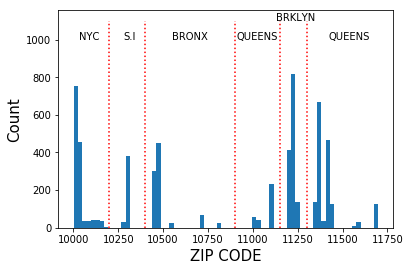

In [43]:
plt.hist(df_nyc.zip_code, bins=70);
plt.vlines(10200, ymin=0, ymax=1100, colors='red', linestyles='dotted' )
plt.vlines(10400, ymin=0, ymax=1100, colors='red', linestyles='dotted' )
plt.vlines(10900, ymin=0, ymax=1100, colors='red', linestyles='dotted' )
plt.vlines(11150, ymin=0, ymax=1100, colors='red', linestyles='dotted' )
plt.vlines(11300, ymin=0, ymax=1100, colors='red', linestyles='dotted' )
plt.text(10030,1000,'NYC')
plt.text(10280,1000,'S.I')
plt.text(10550,1000,'BRONX')
plt.text(10910,1000,'QUEENS')
plt.text(11130,1100,'BRKLYN')
plt.text(11420,1000,'QUEENS')

plt.xlabel('ZIP CODE', size=15)
plt.ylabel('Count', size=15)

plt.savefig('../zipcode_distribution_after')

In [44]:
df_nyc.to_csv('../yelp_nyc')